In [55]:
#ads
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

ad1 = [0, 0, 0, 1, 1, 0, 1]



In [83]:
p = 0.5
t = 10000
r = stats.beta.rvs(t * p, t * (1 - p), size = t) 



In [84]:
print np.var(r)
print p * (1 - p) / (t + 1)

0.0825734830366
2.499750025e-05


In [85]:
def pointPrecentageLessThan(percentage):
    pass
    

In [90]:
#sample from real 
p = 0.5
t = 100
r = stats.beta.rvs(t * p, t * (1 - p), size = t) * 4 +  1

(1, 5)

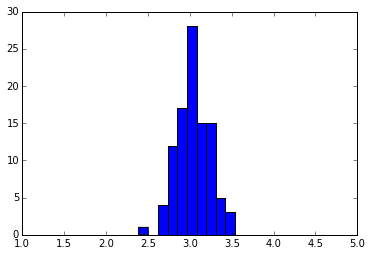

In [91]:
plt.hist(r)
plt.xlim(1,5)

In [269]:
class ratingDist(object):
    def __init__(self, r, t):
        p = (r - 1.0) / 4
        self.alpha = t * p
        self.beta = t * (1 - p)
        
    def sample(self,n):
        return stats.beta.rvs(self.alpha, self.beta, size = n) * 4 +  1
    
    def draw(self):
        x = np.linspace(0, 1, 100)
        y = stats.beta.pdf(x , self.alpha, self.beta)
        plt.plot(x* 4 + 1, y)
        
    def update(self, arr):
        for i in arr:
            pi = (i - 1.0) / 4
            self.alpha +=  pi
            self.beta += 1 - pi
            
    def pointOfPLess(self, percentage):
        return stats.beta.ppf(percentage, self.alpha, self.beta) * 4 + 1

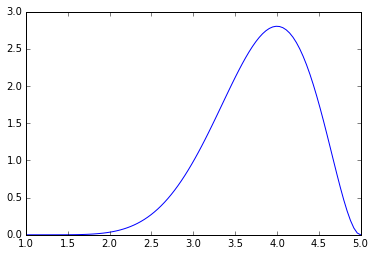

In [296]:
r = ratingDist(3.8, 10)
r.draw()

In [297]:
ratings = r.sample(1000)

In [298]:
np.mean(ratings)

3.7849501146191145

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   1.,   2.,   3.,   1.,   1.,   2.,   2.,   3.,   3.,
          2.,   2.,   5.,   2.,   4.,   1.,   1.,   9.,   6.,   6.,   7.,
          3.,   9.,   7.,   7.,   8.,   6.,   6.,   9.,   9.,  14.,  12.,
         10.,   7.,  19.,  12.,  13.,  13.,  16.,  17.,  18.,  11.,  24.,
         18.,  27.,  16.,  21.,  22.,  19.,  15.,  19.,  24.,  20.,  25.,
         15.,  22.,  24.,  18.,  23.,  18.,  19.,  23.,  25.,  20.,  16.,
         12.,  18.,  15.,  13.,  17.,  12.,  15.,  19.,  18.,  10.,   8.,
         12.,   9.,   9.,   6.,   8.,   8.,   8.,   6.,   4.,   0.,   4.,
          2.]),
 array([ 1.87405259,  1.90449002,  1.93492745,  1.96536487,  1.9958023 ,
         2.02623972,  2.05667715,  2.08711458,  2.117552  ,  2.14798943,
         2.17842685,  2.20886428,  2.23930171,  2.26973913,  2.30017656,
         2.33061398,  2.36105141,  2.39148884,  2.42192626,  2.45236369,
         2.48280111,  2.51

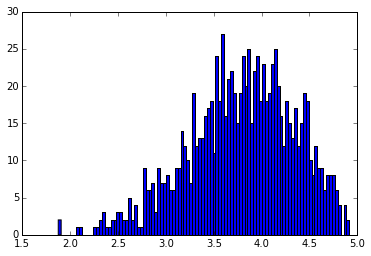

In [299]:
plt.hist(ratings, bins=100)

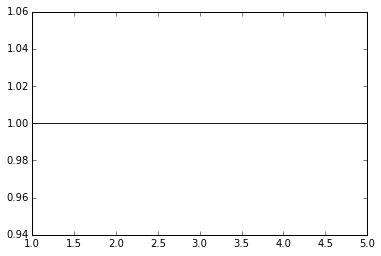

In [300]:
re = ratingDist(3.0, 2)
re.draw()

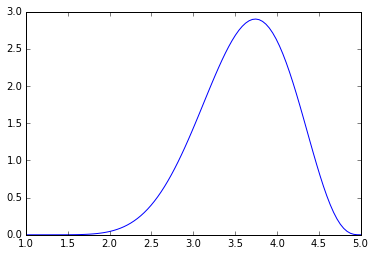

In [301]:
re.update(ratings[:10])
re.draw()

In [302]:
re.pointOfPLess(0.1)

2.9043203078791824

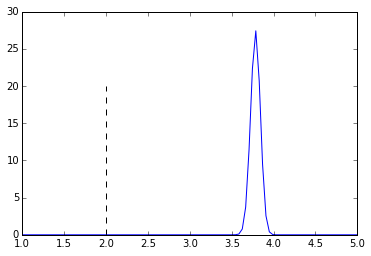

In [303]:
re.update(ratings[10:])
re.draw()
plt.vlines(2, 0, 20, color="k", linestyles="--", lw=1)

In [304]:
re.pointOfPLess(0.1)

3.7085664311593094